In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
import warnings
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
import xgboost as xgb
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import LabelEncoder



data = pd.read_csv('../../data//promice/preprocessed/daily/SCO_L.csv')
data = data.drop(['Unnamed: 0','Surface height from combined measurements DELTA', 'Surface height from combined measurements'], axis=1)
data.index = pd.to_datetime(data['Datetime'], format='%Y-%m-%d')
data['Datetime'] = pd.to_datetime(data['Datetime'], format='%Y-%m-%d')
#display(data)

In [2]:

def add_features(data):
    df = data.copy()
    df['DayOfYear'] = df['Datetime'].dt.dayofyear
    df['WeekNum'] = df['Datetime'].dt.isocalendar().week.astype(int)
    df['Month'] = df['Datetime'].dt.month
    df['Year'] = df['Datetime'].dt.year
    return df

data = add_features(data)


# Calculating Melt Season Start

In [26]:
def create_lagged_features(df, n_lags):
    lagged_df = pd.DataFrame()
    
    for i in df.columns:
        for j in range(1,n_lags+1):
            lagged_df[f'{i}_lag_{j}'] = df[i].shift(j).copy()
    return lagged_df.copy()

# function that populates event and time to event data
def  time_to_event_calc(df, year_data, event):
    
    #print(df.loc[df.index.year].shape)
    print(year_data['Year'].unique()[0])
    

    return df

def results_summary(df, results):
    results_df = df.merge(results, how='left', left_index=True, right_index=True)]
    results_df = results_df.loc[results.index]
    results_df['pred_date'] = results_df['DayOfYear'] + results_df['xgb_pred']
    results_df['event_date'] = 0

    test_years = results_df.index.year.unique()


    #weekly_data = results_df['pred_date'].resample('W').mean() 
    monthly_data = results_df['pred_date'].resample('M').mean()
    quarterly_data = results_df['pred_date'].resample('Q').mean()
    yearly_data = results_df['pred_date'].resample('Y').mean()

    result_agg = pd.concat([monthly_data, quarterly_data,yearly_data], axis=1,keys=['Monthly','Quarterly','Yearly'])
    result_agg = result_agg.merge(results_df['event_date'], how='left',left_index=True,right_index=True)
    result_agg = result_agg.loc[((result_agg.index.year).isin(test_years))]



    result_agg = result_agg.dropna(how='all')

    for year in test_years:
        event = results_df.loc[(results_df['Year'] == year) & (results_df['event'] == 1),'DayOfYear']
        result_agg.loc[result_agg.index.year == year,['event_date']] = int(event)
    
    result_agg[''] = '|'
    result_agg['Month_diff'] = result_agg['Monthly'] - result_agg['event_date']
    result_agg['Quarter_diff'] = result_agg['Quarterly'] - result_agg['event_date']
    result_agg['Year_diff'] = result_agg['Yearly'] - result_agg['event_date']

    result_agg.index = result_agg.index.strftime('%Y-%m-%d')
    result_agg.fillna('',inplace=True)

    return result_agg

display(results_summary(df,results))


KeyError: "[Timestamp('2017-05-02 00:00:00+0000', tz='UTC'), Timestamp('2017-05-03 00:00:00+0000', tz='UTC'), Timestamp('2017-05-04 00:00:00+0000', tz='UTC'), Timestamp('2017-05-05 00:00:00+0000', tz='UTC'), Timestamp('2017-05-06 00:00:00+0000', tz='UTC'), Timestamp('2017-05-07 00:00:00+0000', tz='UTC'), Timestamp('2017-05-08 00:00:00+0000', tz='UTC'), Timestamp('2017-05-09 00:00:00+0000', tz='UTC'), Timestamp('2017-05-10 00:00:00+0000', tz='UTC'), Timestamp('2017-05-11 00:00:00+0000', tz='UTC'), Timestamp('2017-05-12 00:00:00+0000', tz='UTC'), Timestamp('2017-05-13 00:00:00+0000', tz='UTC'), Timestamp('2017-05-14 00:00:00+0000', tz='UTC'), Timestamp('2017-05-30 00:00:00+0000', tz='UTC'), Timestamp('2017-05-31 00:00:00+0000', tz='UTC'), Timestamp('2017-06-01 00:00:00+0000', tz='UTC'), Timestamp('2017-06-02 00:00:00+0000', tz='UTC'), Timestamp('2017-06-03 00:00:00+0000', tz='UTC'), Timestamp('2017-06-04 00:00:00+0000', tz='UTC'), Timestamp('2017-06-05 00:00:00+0000', tz='UTC'), Timestamp('2017-06-06 00:00:00+0000', tz='UTC'), Timestamp('2017-06-07 00:00:00+0000', tz='UTC'), Timestamp('2017-06-08 00:00:00+0000', tz='UTC'), Timestamp('2017-06-09 00:00:00+0000', tz='UTC'), Timestamp('2017-06-10 00:00:00+0000', tz='UTC'), Timestamp('2017-06-11 00:00:00+0000', tz='UTC'), Timestamp('2017-06-12 00:00:00+0000', tz='UTC'), Timestamp('2017-06-13 00:00:00+0000', tz='UTC'), Timestamp('2017-06-14 00:00:00+0000', tz='UTC'), Timestamp('2017-06-15 00:00:00+0000', tz='UTC'), Timestamp('2017-06-16 00:00:00+0000', tz='UTC'), Timestamp('2017-06-17 00:00:00+0000', tz='UTC'), Timestamp('2017-06-18 00:00:00+0000', tz='UTC'), Timestamp('2017-06-19 00:00:00+0000', tz='UTC'), Timestamp('2017-06-20 00:00:00+0000', tz='UTC'), Timestamp('2017-06-21 00:00:00+0000', tz='UTC'), Timestamp('2017-06-22 00:00:00+0000', tz='UTC'), Timestamp('2017-06-23 00:00:00+0000', tz='UTC'), Timestamp('2017-06-24 00:00:00+0000', tz='UTC'), Timestamp('2017-06-25 00:00:00+0000', tz='UTC'), Timestamp('2017-06-26 00:00:00+0000', tz='UTC'), Timestamp('2017-06-27 00:00:00+0000', tz='UTC'), Timestamp('2017-06-28 00:00:00+0000', tz='UTC'), Timestamp('2017-06-29 00:00:00+0000', tz='UTC'), Timestamp('2017-06-30 00:00:00+0000', tz='UTC'), Timestamp('2017-07-01 00:00:00+0000', tz='UTC'), Timestamp('2017-07-02 00:00:00+0000', tz='UTC'), Timestamp('2017-07-03 00:00:00+0000', tz='UTC'), Timestamp('2017-07-04 00:00:00+0000', tz='UTC'), Timestamp('2017-07-05 00:00:00+0000', tz='UTC'), Timestamp('2017-07-06 00:00:00+0000', tz='UTC'), Timestamp('2017-07-07 00:00:00+0000', tz='UTC'), Timestamp('2017-07-08 00:00:00+0000', tz='UTC'), Timestamp('2017-07-09 00:00:00+0000', tz='UTC'), Timestamp('2017-07-10 00:00:00+0000', tz='UTC'), Timestamp('2017-07-11 00:00:00+0000', tz='UTC'), Timestamp('2017-07-12 00:00:00+0000', tz='UTC'), Timestamp('2017-07-13 00:00:00+0000', tz='UTC'), Timestamp('2017-07-14 00:00:00+0000', tz='UTC'), Timestamp('2017-07-15 00:00:00+0000', tz='UTC'), Timestamp('2017-07-16 00:00:00+0000', tz='UTC'), Timestamp('2017-07-17 00:00:00+0000', tz='UTC'), Timestamp('2017-07-18 00:00:00+0000', tz='UTC'), Timestamp('2017-07-19 00:00:00+0000', tz='UTC'), Timestamp('2017-07-20 00:00:00+0000', tz='UTC'), Timestamp('2017-07-21 00:00:00+0000', tz='UTC'), Timestamp('2017-07-22 00:00:00+0000', tz='UTC'), Timestamp('2017-07-23 00:00:00+0000', tz='UTC'), Timestamp('2017-07-24 00:00:00+0000', tz='UTC'), Timestamp('2017-07-25 00:00:00+0000', tz='UTC'), Timestamp('2017-07-26 00:00:00+0000', tz='UTC'), Timestamp('2017-07-27 00:00:00+0000', tz='UTC'), Timestamp('2017-07-28 00:00:00+0000', tz='UTC'), Timestamp('2017-07-29 00:00:00+0000', tz='UTC'), Timestamp('2017-07-30 00:00:00+0000', tz='UTC'), Timestamp('2017-07-31 00:00:00+0000', tz='UTC'), Timestamp('2017-08-01 00:00:00+0000', tz='UTC'), Timestamp('2017-08-02 00:00:00+0000', tz='UTC'), Timestamp('2017-08-03 00:00:00+0000', tz='UTC'), Timestamp('2017-08-04 00:00:00+0000', tz='UTC'), Timestamp('2017-08-05 00:00:00+0000', tz='UTC'), Timestamp('2017-08-06 00:00:00+0000', tz='UTC'), Timestamp('2017-08-07 00:00:00+0000', tz='UTC'), Timestamp('2017-08-08 00:00:00+0000', tz='UTC'), Timestamp('2017-08-09 00:00:00+0000', tz='UTC'), Timestamp('2017-08-10 00:00:00+0000', tz='UTC'), Timestamp('2017-08-11 00:00:00+0000', tz='UTC'), Timestamp('2017-08-17 00:00:00+0000', tz='UTC'), Timestamp('2017-08-18 00:00:00+0000', tz='UTC'), Timestamp('2017-08-19 00:00:00+0000', tz='UTC'), Timestamp('2017-08-20 00:00:00+0000', tz='UTC'), Timestamp('2017-08-21 00:00:00+0000', tz='UTC'), Timestamp('2017-08-22 00:00:00+0000', tz='UTC'), Timestamp('2017-08-23 00:00:00+0000', tz='UTC'), Timestamp('2017-08-24 00:00:00+0000', tz='UTC'), Timestamp('2017-08-25 00:00:00+0000', tz='UTC'), Timestamp('2017-08-26 00:00:00+0000', tz='UTC'), Timestamp('2017-08-27 00:00:00+0000', tz='UTC'), Timestamp('2017-08-28 00:00:00+0000', tz='UTC'), Timestamp('2017-08-29 00:00:00+0000', tz='UTC'), Timestamp('2017-08-30 00:00:00+0000', tz='UTC'), Timestamp('2017-08-31 00:00:00+0000', tz='UTC'), Timestamp('2017-09-01 00:00:00+0000', tz='UTC'), Timestamp('2017-09-02 00:00:00+0000', tz='UTC'), Timestamp('2017-09-03 00:00:00+0000', tz='UTC'), Timestamp('2017-09-04 00:00:00+0000', tz='UTC'), Timestamp('2017-09-05 00:00:00+0000', tz='UTC'), Timestamp('2017-09-06 00:00:00+0000', tz='UTC'), Timestamp('2017-09-07 00:00:00+0000', tz='UTC'), Timestamp('2017-09-08 00:00:00+0000', tz='UTC'), Timestamp('2017-09-09 00:00:00+0000', tz='UTC'), Timestamp('2017-09-10 00:00:00+0000', tz='UTC'), Timestamp('2017-09-11 00:00:00+0000', tz='UTC'), Timestamp('2017-09-12 00:00:00+0000', tz='UTC'), Timestamp('2020-05-08 00:00:00+0000', tz='UTC'), Timestamp('2020-05-09 00:00:00+0000', tz='UTC'), Timestamp('2020-05-10 00:00:00+0000', tz='UTC'), Timestamp('2020-05-11 00:00:00+0000', tz='UTC'), Timestamp('2020-05-12 00:00:00+0000', tz='UTC'), Timestamp('2020-05-13 00:00:00+0000', tz='UTC'), Timestamp('2020-05-14 00:00:00+0000', tz='UTC'), Timestamp('2020-05-15 00:00:00+0000', tz='UTC'), Timestamp('2020-05-16 00:00:00+0000', tz='UTC'), Timestamp('2020-05-17 00:00:00+0000', tz='UTC'), Timestamp('2020-05-18 00:00:00+0000', tz='UTC'), Timestamp('2020-05-19 00:00:00+0000', tz='UTC'), Timestamp('2020-05-20 00:00:00+0000', tz='UTC'), Timestamp('2020-05-21 00:00:00+0000', tz='UTC'), Timestamp('2020-05-22 00:00:00+0000', tz='UTC'), Timestamp('2020-05-23 00:00:00+0000', tz='UTC'), Timestamp('2020-05-24 00:00:00+0000', tz='UTC'), Timestamp('2020-05-25 00:00:00+0000', tz='UTC'), Timestamp('2020-05-26 00:00:00+0000', tz='UTC'), Timestamp('2020-05-27 00:00:00+0000', tz='UTC'), Timestamp('2020-05-28 00:00:00+0000', tz='UTC'), Timestamp('2020-05-29 00:00:00+0000', tz='UTC'), Timestamp('2020-05-30 00:00:00+0000', tz='UTC'), Timestamp('2020-05-31 00:00:00+0000', tz='UTC'), Timestamp('2020-06-01 00:00:00+0000', tz='UTC'), Timestamp('2020-06-02 00:00:00+0000', tz='UTC'), Timestamp('2020-06-03 00:00:00+0000', tz='UTC'), Timestamp('2020-06-04 00:00:00+0000', tz='UTC'), Timestamp('2020-06-05 00:00:00+0000', tz='UTC'), Timestamp('2020-06-06 00:00:00+0000', tz='UTC'), Timestamp('2020-06-07 00:00:00+0000', tz='UTC'), Timestamp('2020-06-08 00:00:00+0000', tz='UTC'), Timestamp('2020-06-09 00:00:00+0000', tz='UTC'), Timestamp('2020-06-10 00:00:00+0000', tz='UTC'), Timestamp('2020-06-11 00:00:00+0000', tz='UTC'), Timestamp('2020-06-12 00:00:00+0000', tz='UTC'), Timestamp('2020-06-13 00:00:00+0000', tz='UTC'), Timestamp('2020-06-14 00:00:00+0000', tz='UTC'), Timestamp('2020-06-15 00:00:00+0000', tz='UTC'), Timestamp('2020-06-16 00:00:00+0000', tz='UTC'), Timestamp('2020-06-17 00:00:00+0000', tz='UTC'), Timestamp('2020-06-18 00:00:00+0000', tz='UTC'), Timestamp('2020-06-19 00:00:00+0000', tz='UTC'), Timestamp('2020-06-20 00:00:00+0000', tz='UTC'), Timestamp('2020-06-21 00:00:00+0000', tz='UTC'), Timestamp('2020-06-22 00:00:00+0000', tz='UTC'), Timestamp('2020-06-23 00:00:00+0000', tz='UTC'), Timestamp('2020-06-24 00:00:00+0000', tz='UTC'), Timestamp('2020-06-25 00:00:00+0000', tz='UTC'), Timestamp('2020-06-26 00:00:00+0000', tz='UTC'), Timestamp('2020-06-27 00:00:00+0000', tz='UTC'), Timestamp('2020-06-28 00:00:00+0000', tz='UTC'), Timestamp('2020-06-29 00:00:00+0000', tz='UTC'), Timestamp('2020-06-30 00:00:00+0000', tz='UTC'), Timestamp('2020-07-01 00:00:00+0000', tz='UTC'), Timestamp('2020-07-02 00:00:00+0000', tz='UTC'), Timestamp('2020-07-03 00:00:00+0000', tz='UTC'), Timestamp('2020-07-04 00:00:00+0000', tz='UTC'), Timestamp('2020-07-05 00:00:00+0000', tz='UTC'), Timestamp('2020-07-06 00:00:00+0000', tz='UTC'), Timestamp('2020-07-07 00:00:00+0000', tz='UTC'), Timestamp('2020-07-08 00:00:00+0000', tz='UTC'), Timestamp('2020-07-09 00:00:00+0000', tz='UTC'), Timestamp('2020-07-10 00:00:00+0000', tz='UTC'), Timestamp('2020-07-11 00:00:00+0000', tz='UTC'), Timestamp('2020-07-12 00:00:00+0000', tz='UTC'), Timestamp('2020-07-13 00:00:00+0000', tz='UTC'), Timestamp('2020-07-14 00:00:00+0000', tz='UTC'), Timestamp('2020-07-15 00:00:00+0000', tz='UTC'), Timestamp('2020-07-16 00:00:00+0000', tz='UTC'), Timestamp('2020-07-17 00:00:00+0000', tz='UTC'), Timestamp('2020-07-18 00:00:00+0000', tz='UTC'), Timestamp('2020-07-19 00:00:00+0000', tz='UTC'), Timestamp('2020-07-20 00:00:00+0000', tz='UTC'), Timestamp('2020-07-21 00:00:00+0000', tz='UTC'), Timestamp('2020-07-22 00:00:00+0000', tz='UTC'), Timestamp('2020-07-23 00:00:00+0000', tz='UTC'), Timestamp('2020-07-24 00:00:00+0000', tz='UTC'), Timestamp('2020-07-25 00:00:00+0000', tz='UTC'), Timestamp('2020-07-26 00:00:00+0000', tz='UTC'), Timestamp('2020-07-27 00:00:00+0000', tz='UTC'), Timestamp('2020-07-28 00:00:00+0000', tz='UTC'), Timestamp('2020-07-29 00:00:00+0000', tz='UTC'), Timestamp('2020-07-30 00:00:00+0000', tz='UTC'), Timestamp('2020-07-31 00:00:00+0000', tz='UTC'), Timestamp('2020-08-01 00:00:00+0000', tz='UTC'), Timestamp('2020-08-02 00:00:00+0000', tz='UTC'), Timestamp('2020-08-03 00:00:00+0000', tz='UTC'), Timestamp('2020-08-09 00:00:00+0000', tz='UTC'), Timestamp('2020-08-10 00:00:00+0000', tz='UTC'), Timestamp('2020-08-11 00:00:00+0000', tz='UTC'), Timestamp('2020-08-12 00:00:00+0000', tz='UTC'), Timestamp('2020-08-13 00:00:00+0000', tz='UTC'), Timestamp('2020-08-14 00:00:00+0000', tz='UTC'), Timestamp('2020-08-15 00:00:00+0000', tz='UTC'), Timestamp('2020-08-16 00:00:00+0000', tz='UTC'), Timestamp('2020-08-17 00:00:00+0000', tz='UTC'), Timestamp('2020-08-18 00:00:00+0000', tz='UTC'), Timestamp('2020-08-19 00:00:00+0000', tz='UTC'), Timestamp('2020-08-20 00:00:00+0000', tz='UTC'), Timestamp('2020-08-21 00:00:00+0000', tz='UTC'), Timestamp('2020-08-22 00:00:00+0000', tz='UTC'), Timestamp('2020-08-23 00:00:00+0000', tz='UTC'), Timestamp('2020-08-24 00:00:00+0000', tz='UTC'), Timestamp('2020-08-25 00:00:00+0000', tz='UTC'), Timestamp('2020-08-26 00:00:00+0000', tz='UTC'), Timestamp('2020-08-27 00:00:00+0000', tz='UTC'), Timestamp('2020-08-28 00:00:00+0000', tz='UTC'), Timestamp('2020-08-29 00:00:00+0000', tz='UTC'), Timestamp('2020-08-30 00:00:00+0000', tz='UTC'), Timestamp('2020-08-31 00:00:00+0000', tz='UTC'), Timestamp('2020-09-01 00:00:00+0000', tz='UTC'), Timestamp('2020-09-02 00:00:00+0000', tz='UTC'), Timestamp('2020-09-03 00:00:00+0000', tz='UTC'), Timestamp('2020-09-04 00:00:00+0000', tz='UTC'), Timestamp('2020-09-05 00:00:00+0000', tz='UTC'), Timestamp('2020-09-06 00:00:00+0000', tz='UTC'), Timestamp('2020-09-07 00:00:00+0000', tz='UTC'), Timestamp('2020-09-08 00:00:00+0000', tz='UTC'), Timestamp('2020-09-09 00:00:00+0000', tz='UTC'), Timestamp('2020-09-10 00:00:00+0000', tz='UTC'), Timestamp('2020-09-11 00:00:00+0000', tz='UTC'), Timestamp('2020-09-12 00:00:00+0000', tz='UTC'), Timestamp('2020-09-13 00:00:00+0000', tz='UTC'), Timestamp('2021-05-22 00:00:00+0000', tz='UTC'), Timestamp('2021-05-23 00:00:00+0000', tz='UTC'), Timestamp('2021-05-24 00:00:00+0000', tz='UTC'), Timestamp('2021-05-25 00:00:00+0000', tz='UTC'), Timestamp('2021-05-26 00:00:00+0000', tz='UTC'), Timestamp('2021-05-27 00:00:00+0000', tz='UTC'), Timestamp('2021-05-28 00:00:00+0000', tz='UTC'), Timestamp('2021-05-29 00:00:00+0000', tz='UTC'), Timestamp('2021-05-30 00:00:00+0000', tz='UTC'), Timestamp('2021-05-31 00:00:00+0000', tz='UTC'), Timestamp('2021-06-01 00:00:00+0000', tz='UTC'), Timestamp('2021-06-02 00:00:00+0000', tz='UTC'), Timestamp('2021-06-03 00:00:00+0000', tz='UTC'), Timestamp('2021-06-04 00:00:00+0000', tz='UTC'), Timestamp('2021-06-05 00:00:00+0000', tz='UTC'), Timestamp('2021-06-06 00:00:00+0000', tz='UTC'), Timestamp('2021-06-07 00:00:00+0000', tz='UTC'), Timestamp('2021-06-08 00:00:00+0000', tz='UTC'), Timestamp('2021-06-09 00:00:00+0000', tz='UTC'), Timestamp('2021-06-10 00:00:00+0000', tz='UTC'), Timestamp('2021-06-11 00:00:00+0000', tz='UTC'), Timestamp('2021-06-12 00:00:00+0000', tz='UTC'), Timestamp('2021-06-13 00:00:00+0000', tz='UTC'), Timestamp('2021-06-14 00:00:00+0000', tz='UTC'), Timestamp('2021-06-15 00:00:00+0000', tz='UTC'), Timestamp('2021-06-16 00:00:00+0000', tz='UTC'), Timestamp('2021-06-17 00:00:00+0000', tz='UTC'), Timestamp('2021-06-18 00:00:00+0000', tz='UTC'), Timestamp('2021-06-19 00:00:00+0000', tz='UTC'), Timestamp('2021-06-20 00:00:00+0000', tz='UTC'), Timestamp('2021-06-21 00:00:00+0000', tz='UTC'), Timestamp('2021-06-22 00:00:00+0000', tz='UTC'), Timestamp('2021-06-23 00:00:00+0000', tz='UTC'), Timestamp('2021-06-24 00:00:00+0000', tz='UTC'), Timestamp('2021-06-25 00:00:00+0000', tz='UTC'), Timestamp('2021-06-26 00:00:00+0000', tz='UTC'), Timestamp('2021-06-27 00:00:00+0000', tz='UTC'), Timestamp('2021-06-28 00:00:00+0000', tz='UTC'), Timestamp('2021-06-29 00:00:00+0000', tz='UTC'), Timestamp('2021-06-30 00:00:00+0000', tz='UTC'), Timestamp('2021-07-01 00:00:00+0000', tz='UTC'), Timestamp('2021-07-02 00:00:00+0000', tz='UTC'), Timestamp('2021-07-03 00:00:00+0000', tz='UTC'), Timestamp('2021-07-04 00:00:00+0000', tz='UTC'), Timestamp('2021-07-05 00:00:00+0000', tz='UTC'), Timestamp('2021-07-06 00:00:00+0000', tz='UTC'), Timestamp('2021-07-07 00:00:00+0000', tz='UTC'), Timestamp('2021-07-08 00:00:00+0000', tz='UTC'), Timestamp('2021-07-09 00:00:00+0000', tz='UTC'), Timestamp('2021-07-10 00:00:00+0000', tz='UTC'), Timestamp('2021-07-11 00:00:00+0000', tz='UTC'), Timestamp('2021-07-12 00:00:00+0000', tz='UTC'), Timestamp('2021-07-13 00:00:00+0000', tz='UTC'), Timestamp('2021-07-14 00:00:00+0000', tz='UTC'), Timestamp('2021-07-15 00:00:00+0000', tz='UTC'), Timestamp('2021-07-16 00:00:00+0000', tz='UTC'), Timestamp('2021-07-17 00:00:00+0000', tz='UTC'), Timestamp('2021-07-18 00:00:00+0000', tz='UTC'), Timestamp('2021-07-19 00:00:00+0000', tz='UTC'), Timestamp('2021-07-20 00:00:00+0000', tz='UTC'), Timestamp('2021-07-21 00:00:00+0000', tz='UTC'), Timestamp('2021-07-22 00:00:00+0000', tz='UTC'), Timestamp('2021-07-23 00:00:00+0000', tz='UTC'), Timestamp('2021-07-24 00:00:00+0000', tz='UTC'), Timestamp('2021-07-25 00:00:00+0000', tz='UTC'), Timestamp('2021-07-26 00:00:00+0000', tz='UTC'), Timestamp('2021-07-27 00:00:00+0000', tz='UTC'), Timestamp('2021-07-28 00:00:00+0000', tz='UTC'), Timestamp('2021-07-29 00:00:00+0000', tz='UTC'), Timestamp('2021-07-30 00:00:00+0000', tz='UTC'), Timestamp('2021-07-31 00:00:00+0000', tz='UTC'), Timestamp('2021-08-01 00:00:00+0000', tz='UTC'), Timestamp('2021-08-02 00:00:00+0000', tz='UTC'), Timestamp('2021-08-03 00:00:00+0000', tz='UTC'), Timestamp('2021-08-04 00:00:00+0000', tz='UTC'), Timestamp('2021-08-05 00:00:00+0000', tz='UTC'), Timestamp('2021-08-06 00:00:00+0000', tz='UTC'), Timestamp('2021-08-07 00:00:00+0000', tz='UTC'), Timestamp('2021-08-08 00:00:00+0000', tz='UTC'), Timestamp('2021-08-09 00:00:00+0000', tz='UTC'), Timestamp('2021-08-10 00:00:00+0000', tz='UTC'), Timestamp('2021-08-11 00:00:00+0000', tz='UTC'), Timestamp('2021-08-12 00:00:00+0000', tz='UTC'), Timestamp('2021-08-13 00:00:00+0000', tz='UTC'), Timestamp('2021-08-14 00:00:00+0000', tz='UTC'), Timestamp('2021-08-15 00:00:00+0000', tz='UTC'), Timestamp('2021-08-16 00:00:00+0000', tz='UTC'), Timestamp('2021-08-17 00:00:00+0000', tz='UTC'), Timestamp('2021-08-18 00:00:00+0000', tz='UTC'), Timestamp('2021-08-19 00:00:00+0000', tz='UTC'), Timestamp('2021-08-20 00:00:00+0000', tz='UTC'), Timestamp('2021-08-21 00:00:00+0000', tz='UTC'), Timestamp('2021-08-22 00:00:00+0000', tz='UTC'), Timestamp('2021-08-23 00:00:00+0000', tz='UTC'), Timestamp('2021-08-24 00:00:00+0000', tz='UTC'), Timestamp('2021-08-25 00:00:00+0000', tz='UTC'), Timestamp('2021-08-26 00:00:00+0000', tz='UTC'), Timestamp('2021-08-27 00:00:00+0000', tz='UTC'), Timestamp('2021-08-28 00:00:00+0000', tz='UTC'), Timestamp('2021-08-29 00:00:00+0000', tz='UTC'), Timestamp('2021-08-30 00:00:00+0000', tz='UTC'), Timestamp('2021-08-31 00:00:00+0000', tz='UTC'), Timestamp('2021-09-01 00:00:00+0000', tz='UTC'), Timestamp('2021-09-02 00:00:00+0000', tz='UTC'), Timestamp('2021-09-03 00:00:00+0000', tz='UTC'), Timestamp('2021-09-04 00:00:00+0000', tz='UTC'), Timestamp('2021-09-05 00:00:00+0000', tz='UTC'), Timestamp('2021-09-06 00:00:00+0000', tz='UTC'), Timestamp('2021-09-07 00:00:00+0000', tz='UTC'), Timestamp('2021-09-08 00:00:00+0000', tz='UTC'), Timestamp('2021-09-09 00:00:00+0000', tz='UTC'), Timestamp('2021-09-10 00:00:00+0000', tz='UTC'), Timestamp('2021-09-11 00:00:00+0000', tz='UTC'), Timestamp('2021-09-12 00:00:00+0000', tz='UTC'), Timestamp('2021-09-13 00:00:00+0000', tz='UTC'), Timestamp('2021-09-14 00:00:00+0000', tz='UTC'), Timestamp('2021-09-15 00:00:00+0000', tz='UTC'), Timestamp('2021-09-16 00:00:00+0000', tz='UTC'), Timestamp('2021-09-17 00:00:00+0000', tz='UTC'), Timestamp('2021-09-18 00:00:00+0000', tz='UTC')] not in index"

In [63]:
warnings.simplefilter(action='ignore', category=pd.errors.PerformanceWarning)

def preprocessing_melt(data, start_end='start', lags=False):
    # Preprocessing 
    df = data.copy()
    df = df.bfill()

    #create event and time to event columns
    df['event'] = 0
    df['event_True'] = 0
    df.loc[:,'event_True'] = True
    df['time_to_event'] = 0



    # min/max scaling
    train_columns = df.drop(['stid','Datetime','Ablation','Melting Season','WeekNum','Month','Year','time_to_event', 'event', 'event_True', 'DayOfYear'],axis=1).columns
    scaler = MinMaxScaler()
    df[train_columns] = scaler.fit_transform(df[train_columns])

    # include lags if not False and specify features/target columns
    if type(lags) == int:
        lagged_features = create_lagged_features(df[train_columns], lags)
        features = pd.merge(df[train_columns], lagged_features, how='left', left_index=True, right_index=True)

    elif not lags:
        features = df[train_columns]
    else:
        raise ValueError('Lags input not accepted, needs to be False or int')
    


    
    # calculate event date and time to event per year
    unique_years = df['Year'].unique()
    for year in unique_years:
        # Filter data for the current year
        year_data = df[df['Year'] == year]

        if start_end == 'start':
            event = year_data.loc[year_data['Ablation'] == True].index.min()
            df.loc[df.index == event,['event']] = 1
            df.loc[df.index.year == year, ['time_to_event']] = (event - year_data.index).astype('timedelta64[D]')
            #df.loc[df.index.year == year, ['time_to_event']] = (year_data.index - event).astype('timedelta64[D]')
            
    
        elif start_end == 'end':
            event = year_data.loc[year_data['Ablation'] == True].index.max()
            df.loc[df.index == event,['event']] = 1
            df.loc[df.index.year == year, ['time_to_event']] = (event - year_data.index).astype('timedelta64[D]')


    # filter out first and last year for data completion
    max_year, min_year = df['Year'].max(), df['Year'].min()
    df = df.loc[(df['Year'] != min_year) & (df['Year'] != max_year)]


    #filter relevant period
    if start_end == 'start':
        df = df.loc[df['time_to_event'] >= 0]
    elif start_end == 'end':
        df = df.loc[df['Ablation'] == True]
        #df = df.loc[(df['Month'] >= 5) & (df['Month'] <= 10)]

    
    #drop NaN values and align features/target so they have same dates
    target = df[['event', 'event_True', 'time_to_event']].copy()

    #label_encoder.fit_transform(features

    features.dropna(inplace=True)
    target.dropna(inplace=True)
    
    common_index = features.index.intersection(target.index)
    features = features.loc[common_index]
    target = target.loc[common_index]

    return df, features, target

df, features, target = preprocessing_melt(data, start_end='start',lags=14)
display(target)

,event,event_True,time_to_event
Datetime,,,
2009-01-01 00:00:00+00:00,0,True,152.0
2009-01-02 00:00:00+00:00,0,True,151.0
2009-01-03 00:00:00+00:00,0,True,150.0
2009-01-04 00:00:00+00:00,0,True,149.0
2009-01-05 00:00:00+00:00,0,True,148.0
...,...,...,...
2022-05-25 00:00:00+00:00,0,True,4.0
2022-05-26 00:00:00+00:00,0,True,3.0
2022-05-27 00:00:00+00:00,0,True,2.0


In [24]:
display(df.loc[df['event'] == True])


,stid,Datetime,Air pressure (upper boom),Air temperature (upper boom),Relative humidity (upper boom) - corrected,Specific humidity (upper boom),Wind speed (upper boom),Wind from direction (upper boom),Downwelling shortwave radiation - corrected,Upwelling shortwave radiation - corrected,...,Cloud cover,Ablation,Melting Season,DayOfYear,WeekNum,Month,Year,event,event_True,time_to_event
Datetime,,,,,,,,,,,,,,,,,,,,,
2009-06-02 00:00:00+00:00,SCO_L,2009-06-02 00:00:00+00:00,0.695775,0.827946,0.445949,0.501834,0.207323,0.251244,0.767005,0.613490,...,0.210147,True,beginning,153,23,6,2009,1,0.0,0.0
2010-06-03 00:00:00+00:00,SCO_L,2010-06-03 00:00:00+00:00,0.609664,0.794403,0.650356,0.566825,0.207323,0.251244,0.852937,0.622922,...,0.232908,True,beginning,154,22,6,2010,1,0.0,0.0
2011-06-13 00:00:00+00:00,SCO_L,2011-06-13 00:00:00+00:00,0.744702,0.797098,0.764112,0.633165,0.049869,0.455999,0.792042,0.407008,...,0.583500,True,beginning,164,24,6,2011,1,0.0,0.0
2012-06-06 00:00:00+00:00,SCO_L,2012-06-06 00:00:00+00:00,0.677148,0.761139,0.816798,0.596806,0.063956,0.592269,0.593545,0.408260,...,0.842254,True,beginning,158,23,6,2012,1,0.0,0.0
2013-06-05 00:00:00+00:00,SCO_L,2013-06-05 00:00:00+00:00,0.604661,0.962075,0.230412,0.550206,0.309116,0.503245,0.896290,0.566533,...,0.180382,True,beginning,156,23,6,2013,1,0.0,0.0
2014-06-03 00:00:00+00:00,SCO_L,2014-06-03 00:00:00+00:00,0.610440,0.778201,0.550132,0.489829,0.194610,0.340579,0.936323,0.691671,...,0.215566,True,beginning,154,23,6,2014,1,0.0,0.0
2015-05-15 00:00:00+00:00,SCO_L,2015-05-15 00:00:00+00:00,0.502641,0.665598,0.511624,0.320589,0.175771,0.473748,0.673693,0.754913,...,0.466858,True,beginning,135,20,5,2015,1,0.0,0.0
2016-05-01 00:00:00+00:00,SCO_L,2016-05-01 00:00:00+00:00,0.582792,0.759046,0.533787,0.455357,0.628490,0.279460,0.462175,0.512552,...,0.679173,True,beginning,122,17,5,2016,1,0.0,0.0
2017-05-01 00:00:00+00:00,SCO_L,2017-05-01 00:00:00+00:00,0.716382,0.630174,0.493187,0.276016,0.424544,0.131759,0.617263,0.718278,...,0.270218,True,beginning,121,18,5,2017,1,0.0,0.0


In [6]:
def custom_train_test_split(df, features, target, by_year=True):
    
    if by_year:

        unique_years = df['Year'].unique()
        train_years, test_years = train_test_split(unique_years, test_size=0.2, random_state=2023)

        train = df.loc[df['Year'].isin(train_years)].index
        test = df.loc[df['Year'].isin(test_years)].index
        X_train = features.loc[features.index.isin(train)]
        y_train = target.loc[target.index.isin(train)]
        X_test = features.loc[features.index.isin(test)]
        y_test = target.loc[features.index.isin(test)]

    elif not by_year:
        X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, shuffle=True, random_state=42)

    else:
        raise ValueError('by_year variable must be True or False')

    return X_train, X_test, y_train, y_test


X_train, X_test, y_train, y_test = custom_train_test_split(df, features, target, by_year=True)
#display(y_test.head(5))

## XGB Gridsearch - Melt season end


In [38]:
# start melt season gridsearch

df, features, target = preprocessing_melt(data, start_end='end',lags=14)
#X_train, X_test, y_train, y_test = custom_train_test_split(df, features, target, by_year=True)


# Create TimeSeriesSplit object
tscv = TimeSeriesSplit(n_splits=2)

# Define the XGBRegressor model
xgb_model = xgb.XGBRegressor()

# Define the parameter grid for the grid search
param_grid = {
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5, 7],
    'n_estimators': [100, 200],
    'subsample': [0.5, 0.8, 1.0],
    'colsample_bytree': [0.5, 0.8, 1.0],
    'reg_alpha': [0.5, 1.0],
    'reg_lambda': [0.5, 1.0],
    'min_child_weight':[1, 3, 5]
}

# Set up the grid search with TimeSeriesSplit for cross-validation
grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    scoring='neg_mean_squared_error',
    cv=tscv,
    verbose=1,
    n_jobs=-1
)

# Fit the grid search to the data
grid_search.fit(features, target['time_to_event'])

# Print the best parameters and corresponding score
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

rmse = np.sqrt(np.abs(grid_search.best_score_))
print("Best RMSE:", rmse)

Fitting 2 folds for each of 1296 candidates, totalling 2592 fits


In [33]:
# Print the best parameters and corresponding score
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

rmse = np.sqrt(np.abs(grid_search.best_score_))
print("Best RMSE:", rmse)

Best parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 7, 'min_child_weight': 5, 'n_estimators': 100, 'reg_alpha': 1.0, 'reg_lambda': 0.5, 'subsample': 0.8}
Best score: -167.15589951498595
Best RMSE: 12.92887850956091


# XGB Regressor models

In [107]:
df, features, target = preprocessing_melt(data, start_end='start',lags=7)
X_train, X_test, y_train, y_test = custom_train_test_split(df, features, target, by_year=True)


xgb_model = xgb.XGBRegressor(
    objective='reg:squarederror',
    max_depth=7,
    min_child_weight=1,
    learning_rate=0.1,
    n_estimators=100,
    subsample=0.8,
    colsample_bytree=1.0,
    reg_alpha=0.5,
    reg_lambda=1.0,
    early_stopping_rounds=20)


#xgb_model.fit(X_train, y_train['time_to_event'])

xgb_model.fit(X_train, y_train['time_to_event'],
        eval_set=[(X_train, y_train['time_to_event']),(X_test,y_test['time_to_event'])],
        verbose=10)

xgb_pred_train = xgb_model.predict(X_train)
xgb_pred_test = xgb_model.predict(X_test)

print("XGBoost MAE - Train:", mean_absolute_error(y_train['time_to_event'], xgb_pred_train))
print("XGBoost MAE - Test:", mean_absolute_error(y_test['time_to_event'], xgb_pred_test))
print("XGBoost MSE - Train:", mean_squared_error(y_train['time_to_event'], xgb_pred_train))
print("XGBoost MSE - Test:", mean_squared_error(y_test['time_to_event'], xgb_pred_test))
print("XGBoost R2 - Train:", r2_score(y_train['time_to_event'], xgb_pred_train))
print("XGBoost R2 - Test:", r2_score(y_test['time_to_event'], xgb_pred_test))

results = y_test['time_to_event'].to_frame()
results['xgb_pred'] = xgb_pred_test
results = results.sort_index()


[0]	validation_0-rmse:77.52726	validation_1-rmse:65.77568
[10]	validation_0-rmse:27.95661	validation_1-rmse:16.50956
[20]	validation_0-rmse:10.39415	validation_1-rmse:10.09197
[30]	validation_0-rmse:4.10129	validation_1-rmse:13.86498
[37]	validation_0-rmse:2.31017	validation_1-rmse:15.28814
XGBoost MAE - Train: 11.664837833732312
XGBoost MAE - Test: 7.789076181558462
XGBoost MSE - Train: 193.82490653555828
XGBoost MSE - Test: 85.18746536668556
XGBoost R2 - Train: 0.8986955268394274
XGBoost R2 - Test: 0.9409658978599977


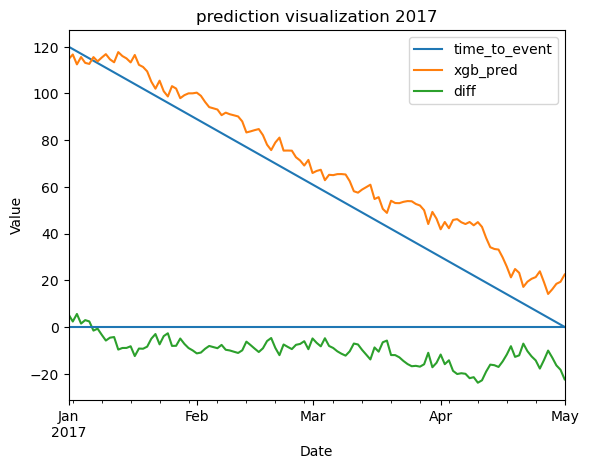

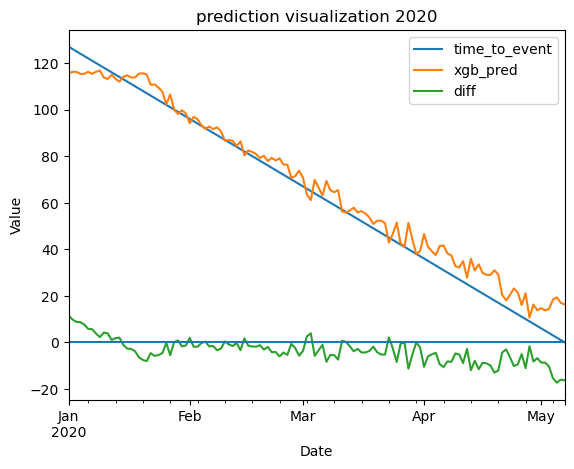

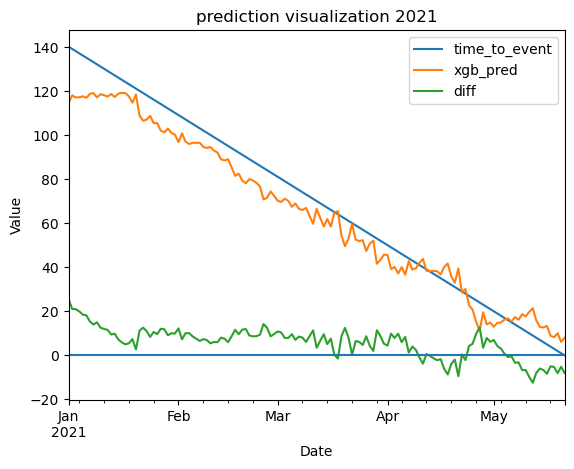

<Axes: title={'center': 'Feature Importance'}>

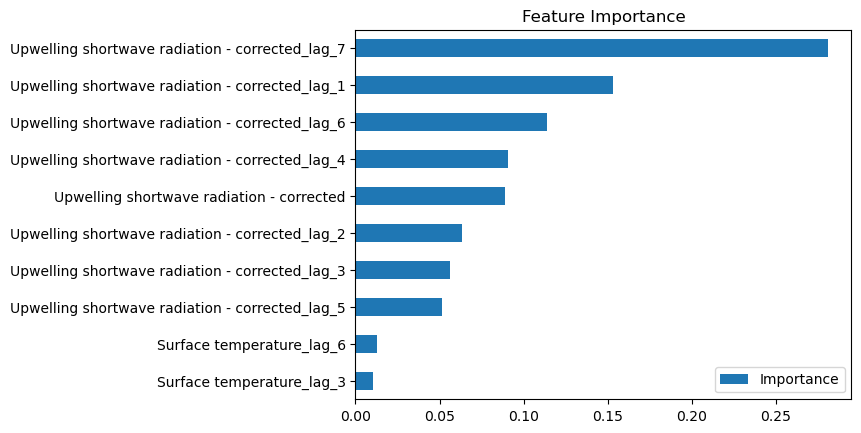

In [108]:
results['diff'] = results['time_to_event'] - results['xgb_pred']


sample_years = y_test.index.year.unique()
#plotting cyclical_conversion
for sample_year in sample_years:    
        results.loc[results.index.year == sample_year].plot()
        plt.xlabel('Date')
        plt.ylabel('Value')
        plt.axhline(y=0)
        plt.title(f'prediction visualization {sample_year}')
        plt.show()

f1 = pd.DataFrame(data=xgb_model.feature_importances_,
        index=xgb_model.feature_names_in_,
        columns=['Importance'])
f1 = f1.loc[f1['Importance'] > 0.01]
f1.sort_values('Importance').plot(kind='barh',title='Feature Importance')


In [109]:
display(results_summary(df,results))

,Monthly,Quarterly,Yearly,event_date,,Month_diff,Quarter_diff,Year_diff
Datetime,,,,,,,,
2017-01-31,125.697605,,,121.0,|,4.697605,,
2017-02-28,129.857087,,,121.0,|,8.857087,,
2017-03-31,132.174555,129.222615,,121.0,|,11.174555,8.222615,
2017-04-30,136.808247,,,121.0,|,15.808247,,
2017-05-31,143.4522,,,121.0,|,22.4522,,
2017-06-30,,137.022568,,121.0,|,,16.022568,
2017-12-31,,,131.22095,121.0,|,,,10.22095
2020-01-31,127.489977,,,128.0,|,-0.510023,,
2020-02-29,130.053136,,,128.0,|,2.053136,,


# Calculating melt season end
-------------------------------------


In [110]:
import xgboost as xgb
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error, r2_score


df, features, target = preprocessing_melt(data, start_end='end',lags=7)
X_train, X_test, y_train, y_test = custom_train_test_split(df, features, target, by_year=True)

xgb_model = xgb.XGBRegressor(
    objective='reg:squarederror',
    max_depth=7,
    min_child_weight=5,
    learning_rate=0.1,
    n_estimators=200,
    subsample=1.0,
    colsample_bytree=0.5,
    reg_alpha=5.0,
    reg_lambda=1.0,
    early_stopping_rounds=20)


#xgb_model.fit(X_train, y_train['time_to_event'])

xgb_model.fit(X_train, y_train['time_to_event'],
        eval_set=[(X_train, y_train['time_to_event']),(X_test,y_test['time_to_event'])],
        verbose=10)

xgb_pred_train = xgb_model.predict(X_train)
xgb_pred_test = xgb_model.predict(X_test)

print("XGBoost MAE - Train:", mean_absolute_error(y_train['time_to_event'], xgb_pred_train))
print("XGBoost MAE - Test:", mean_absolute_error(y_test['time_to_event'], xgb_pred_test))
print("XGBoost MSE - Train:", mean_squared_error(y_train['time_to_event'], xgb_pred_train))
print("XGBoost MSE - Test:", mean_squared_error(y_test['time_to_event'], xgb_pred_test))
print("XGBoost R2 - Train:", r2_score(y_train['time_to_event'], xgb_pred_train))
print("XGBoost R2 - Test:", r2_score(y_test['time_to_event'], xgb_pred_test))

results = y_test['time_to_event'].to_frame()
results['xgb_pred'] = xgb_pred_test
results = results.sort_index()
#display(results)

[0]	validation_0-rmse:56.58402	validation_1-rmse:65.95896
[10]	validation_0-rmse:21.21886	validation_1-rmse:28.94370
[20]	validation_0-rmse:8.66666	validation_1-rmse:16.92276
[30]	validation_0-rmse:4.05963	validation_1-rmse:13.45504
[40]	validation_0-rmse:2.32812	validation_1-rmse:12.36408
[50]	validation_0-rmse:1.53691	validation_1-rmse:12.00026
[60]	validation_0-rmse:1.13166	validation_1-rmse:11.84108
[70]	validation_0-rmse:0.88973	validation_1-rmse:11.78521
[80]	validation_0-rmse:0.72546	validation_1-rmse:11.76741
[90]	validation_0-rmse:0.59593	validation_1-rmse:11.75751
[100]	validation_0-rmse:0.50880	validation_1-rmse:11.74665
[110]	validation_0-rmse:0.44182	validation_1-rmse:11.74631
[120]	validation_0-rmse:0.39484	validation_1-rmse:11.74472
[130]	validation_0-rmse:0.35816	validation_1-rmse:11.74564
[140]	validation_0-rmse:0.32839	validation_1-rmse:11.74550
[145]	validation_0-rmse:0.31567	validation_1-rmse:11.74574
XGBoost MAE - Train: 0.2542476622482902
XGBoost MAE - Test: 8.381

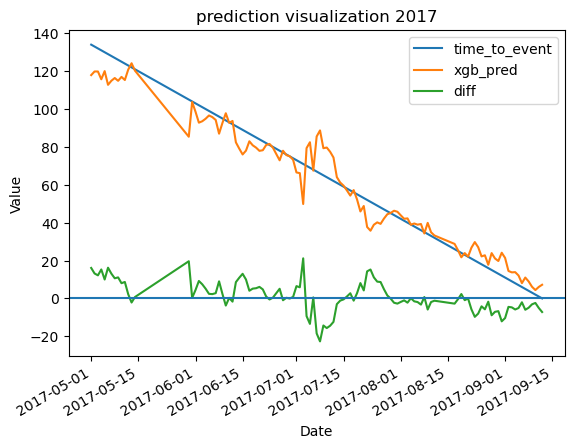

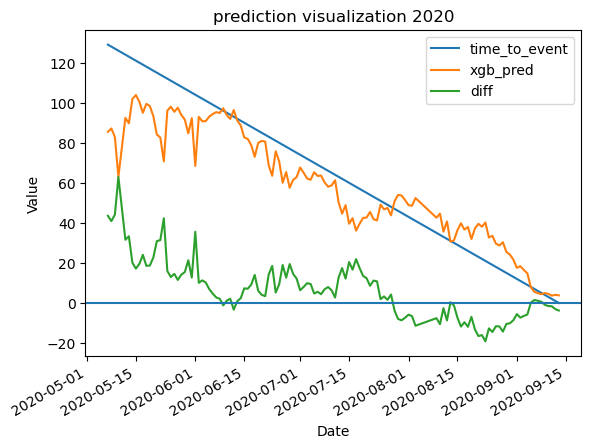

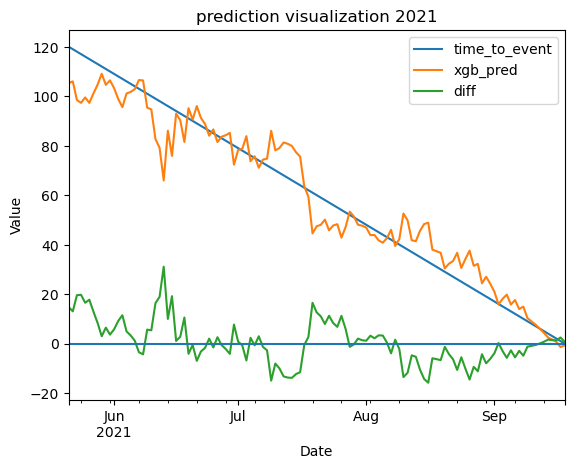

,stid,Datetime,Air pressure (upper boom),Air temperature (upper boom),Relative humidity (upper boom) - corrected,Specific humidity (upper boom),Wind speed (upper boom),Wind from direction (upper boom),Downwelling shortwave radiation - corrected,Upwelling shortwave radiation - corrected,...,Cloud cover,Ablation,Melting Season,DayOfYear,WeekNum,Month,Year,event,event_True,time_to_event
Datetime,,,,,,,,,,,,,,,,,,,,,
2009-06-02 00:00:00+00:00,SCO_L,2009-06-02 00:00:00+00:00,0.695775,0.827946,0.445949,0.501834,0.207323,0.251244,0.767005,0.613490,...,0.210147,True,beginning,153,23,6,2009,0,True,102.0
2009-06-03 00:00:00+00:00,SCO_L,2009-06-03 00:00:00+00:00,0.701307,0.815264,0.527324,0.525527,0.207323,0.251244,0.825661,0.650446,...,0.243163,True,beginning,154,23,6,2009,0,True,101.0
2009-06-04 00:00:00+00:00,SCO_L,2009-06-04 00:00:00+00:00,0.722403,0.705034,0.816341,0.490076,0.207323,0.251244,0.735438,0.633107,...,0.555028,True,beginning,155,23,6,2009,0,True,100.0
2009-06-05 00:00:00+00:00,SCO_L,2009-06-05 00:00:00+00:00,0.697591,0.712844,0.812643,0.501449,0.207323,0.251244,0.460942,0.402259,...,0.921252,True,beginning,156,23,6,2009,0,True,99.0
2009-06-06 00:00:00+00:00,SCO_L,2009-06-06 00:00:00+00:00,0.665338,0.754994,0.746270,0.547008,0.207323,0.251244,0.717231,0.594497,...,0.537602,True,beginning,157,23,6,2009,0,True,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09-25 00:00:00+00:00,SCO_L,2022-09-25 00:00:00+00:00,0.517627,0.741155,0.258623,0.299817,0.899583,0.709714,0.123141,0.112950,...,0.569493,True,end,268,38,9,2022,0,True,4.0
2022-09-26 00:00:00+00:00,SCO_L,2022-09-26 00:00:00+00:00,0.665115,0.653533,0.417544,0.273373,0.335787,0.126218,0.136796,0.125476,...,0.416041,True,end,269,39,9,2022,0,True,3.0
2022-09-27 00:00:00+00:00,SCO_L,2022-09-27 00:00:00+00:00,0.609270,0.685409,0.645945,0.396984,0.255871,0.116918,0.094520,0.086698,...,0.649825,True,end,270,39,9,2022,0,True,2.0


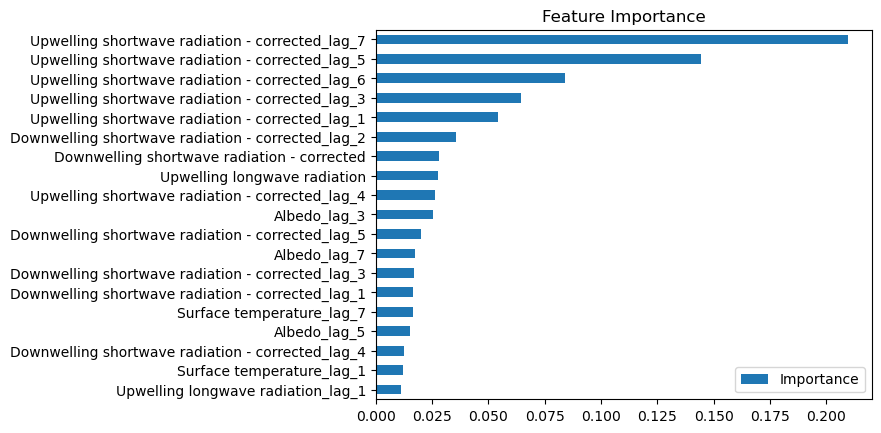

In [111]:
results['diff'] = results['time_to_event'] - results['xgb_pred']


sample_years = y_test.index.year.unique()
#plotting cyclical_conversion
for sample_year in sample_years:    
        results.loc[results.index.year == sample_year].plot()
        plt.xlabel('Date')
        plt.ylabel('Value')
        plt.axhline(y=0)
        plt.title(f'prediction visualization {sample_year}')
        plt.show()

f1 = pd.DataFrame(data=xgb_model.feature_importances_,
        index=xgb_model.feature_names_in_,
        columns=['Importance'])
f1 = f1.loc[f1['Importance'] > 0.01]
f1.sort_values('Importance').plot(kind='barh',title='Feature Importance')
display(df)

In [113]:
display(results_summary(df,results))

,Monthly,Quarterly,Yearly,event_date,,Month_diff,Quarter_diff,Year_diff
Datetime,,,,,,,,
2017-05-31,245.314801,,,255.0,|,-9.685199,,
2017-06-30,251.122872,249.102674,,255.0,|,-3.877128,-5.897326,
2017-07-31,255.47338,,,255.0,|,0.47338,,
2017-08-31,258.545759,,,255.0,|,3.545759,,
2017-09-30,260.109971,257.437451,,255.0,|,5.109971,2.437451,
2017-12-31,,,254.10354,255.0,|,,,-0.89646
2020-05-31,230.300855,,,257.0,|,-26.699145,,
2020-06-30,248.288027,240.11204,,257.0,|,-8.711973,-16.88796,
2020-07-31,249.568493,,,257.0,|,-7.431507,,


# Survival analysis coxPHSurvival

C-index: 0.7061800357686958


,Importance
Downwelling shortwave radiation - corrected,1.533853
Upwelling longwave radiation,1.354379
Specific humidity (upper boom),1.192730
Air temperature (upper boom),1.160738
Surface temperature,1.154028
Downwelling longwave radiation,0.842707
Wind from direction (upper boom),0.576165
Upwelling shortwave radiation - corrected,0.259904
Air pressure (upper boom),0.221595
Sensible heat flux (upper boom),0.129419


,event,event_True,time_to_event
Datetime,,,
2009-01-01 00:00:00+00:00,0,True,152.0
2009-01-02 00:00:00+00:00,0,True,151.0
2009-01-03 00:00:00+00:00,0,True,150.0
2009-01-04 00:00:00+00:00,0,True,149.0
2009-01-05 00:00:00+00:00,0,True,148.0
...,...,...,...
2022-05-25 00:00:00+00:00,0,True,4.0
2022-05-26 00:00:00+00:00,0,True,3.0
2022-05-27 00:00:00+00:00,0,True,2.0


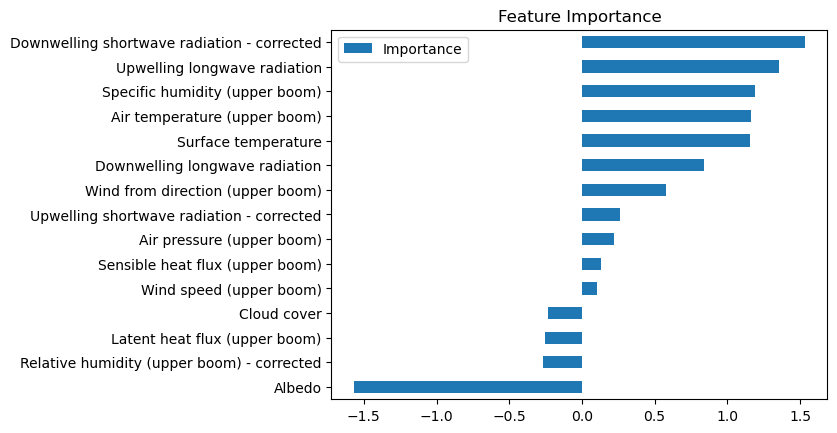

In [68]:
from sksurv.linear_model import CoxPHSurvivalAnalysis
from sksurv.util import Surv
from sksurv.metrics import cumulative_dynamic_auc
from sksurv.metrics import concordance_index_censored

df, features, target = preprocessing_melt(data, start_end='start',lags=False)
X_train, X_test, y_train, y_test = custom_train_test_split(df, features, target, by_year=True)

# Split the data into features (covariates) and the target variables (event and time_to_event)
covariates = X_train  
time_to_event = y_train['time_to_event']
event = y_train['event']
# Create a structured array for the target variables
y = Surv.from_arrays(event, time_to_event)

#[0.1, 0.5, 0.7, 1.0],


# Fit the Cox proportional hazards model
coxph = CoxPHSurvivalAnalysis(alpha=0.7)
coxph.fit(X_train, y)

# Print the model coefficients
#print("Model coefficients:", coxph.coef_)

time_to_event_test = y_test['time_to_event']
event_test = y_test['event_True'].astype('bool')

prediction = coxph.predict(X_test)
result = concordance_index_censored(event_test, time_to_event_test, prediction)
print("C-index:", result[0])

f1 = pd.DataFrame(data=coxph.coef_,
        index=features.columns,
        columns=['Importance']).sort_values(by='Importance',ascending=False)
display(f1)

f1.sort_values('Importance').plot(kind='barh',title='Feature Importance')

# Make predictions on new data (if applicable)
# new_data = pd.DataFrame(...)  # Create a DataFrame with the same structure as 'covariates'
# predicted_survival = coxph.predict_survival_function(new_data)
display(target)

# Survival analysis coxPHSurvival melt end date

C-index: 0.845989668718488


<Axes: title={'center': 'Feature Importance'}>

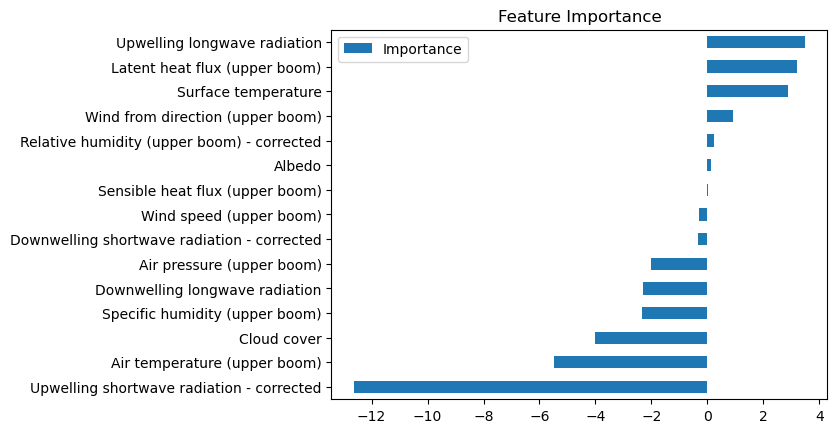

In [78]:
from sksurv.linear_model import CoxPHSurvivalAnalysis
from sksurv.util import Surv
from sksurv.metrics import cumulative_dynamic_auc
from sksurv.metrics import concordance_index_censored

df, features, target = preprocessing_melt(data, start_end='end',lags=False)
X_train, X_test, y_train, y_test = custom_train_test_split(df, features, target, by_year=True)

# Split the data into features (covariates) and the target variables (event and time_to_event)
covariates = X_train  
time_to_event = y_train['time_to_event']
event = y_train['event_True']

# Create a structured array for the target variables
y = Surv.from_arrays(event, time_to_event)

#[0.1, 0.5, 0.7, 1.0],

# Fit the Cox proportional hazards model
coxph = CoxPHSurvivalAnalysis(alpha=0.1)
coxph.fit(X_train, y)

# Print the model coefficients
#print("Model coefficients:", coxph.coef_)

time_to_event_test = y_test['time_to_event']
event_test = y_test['event_True'].astype('bool')

prediction = coxph.predict(X_test)
result = concordance_index_censored(event_test, time_to_event_test, prediction)
print("C-index:", result[0])

f1 = pd.DataFrame(data=coxph.coef_,
        index=features.columns,
        columns=['Importance']).sort_values(by='Importance',ascending=False)
#display(f1)

f1.sort_values('Importance').plot(kind='barh',title='Feature Importance')

# Make predictions on new data (if applicable)
# new_data = pd.DataFrame(...)  # Create a DataFrame with the same structure as 'covariates'
# predicted_survival = coxph.predict_survival_function(new_data)


# Survival Analysis Random Forrest

## Melt season start

C-index: 0.9394051798370537


,Importance
Upwelling shortwave radiation - corrected,0.762155
Downwelling shortwave radiation - corrected,0.107071
Albedo,0.071585
Surface temperature,0.019247
Upwelling longwave radiation,0.016902
Wind from direction (upper boom),0.014299
Air pressure (upper boom),0.003086
Sensible heat flux (upper boom),0.001799
Latent heat flux (upper boom),0.001728
Specific humidity (upper boom),0.000695


<Axes: title={'center': 'Feature Importance'}>

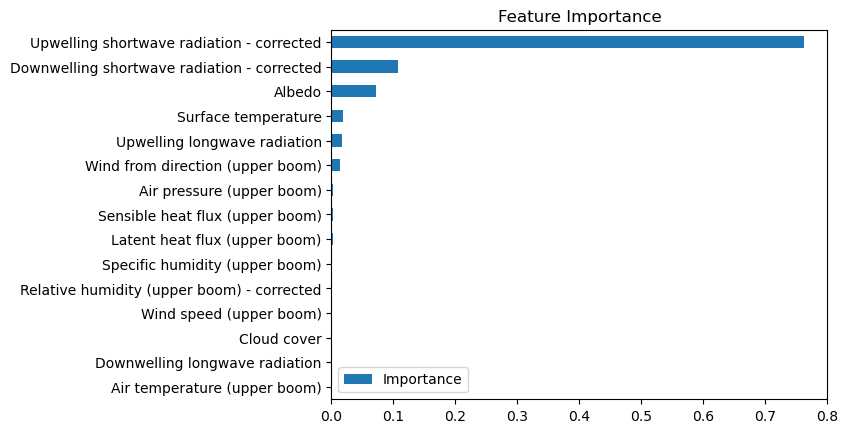

In [102]:
from sksurv.ensemble import GradientBoostingSurvivalAnalysis
from sksurv.metrics import concordance_index_censored

df, features, target = preprocessing_melt(data, start_end='start',lags=False)
X_train, X_test, y_train, y_test = custom_train_test_split(df, features, target, by_year=True)

y_train_array = y_train[['event_True','time_to_event']].to_records(index=False)

gbsa = GradientBoostingSurvivalAnalysis(
    learning_rate=0.1,
    max_depth=3,
    n_estimators=100,
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=42)
gbsa.fit(X_train, y_train_array)

# Make predictions
prediction = gbsa.predict(X_test)

# Compute the concordance index
result = concordance_index_censored(y_test['event_True'], y_test['time_to_event'], prediction)
print("C-index:", result[0])

f1 = pd.DataFrame(data=gbsa.feature_importances_,
        index=features.columns,
        columns=['Importance']).sort_values(by='Importance',ascending=False)
display(f1)

f1.sort_values('Importance').plot(kind='barh',title='Feature Importance')

# Survival gradient end

C-index: 0.882783259612113


,Importance
Upwelling shortwave radiation - corrected,0.460311
Downwelling shortwave radiation - corrected,0.128350
Downwelling longwave radiation,0.099489
Albedo,0.069090
Upwelling longwave radiation,0.052291
Surface temperature,0.047270
Cloud cover,0.039650
Specific humidity (upper boom),0.027343
Latent heat flux (upper boom),0.016893
Air pressure (upper boom),0.015420


<Axes: title={'center': 'Feature Importance'}>

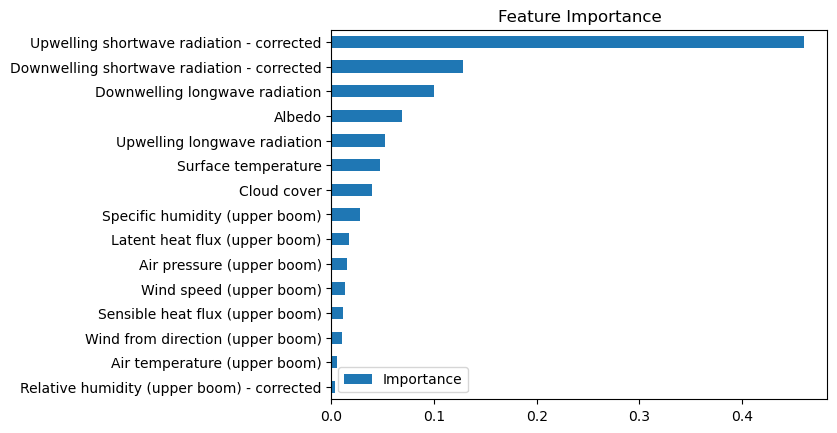

In [89]:
from sksurv.ensemble import GradientBoostingSurvivalAnalysis
from sksurv.metrics import concordance_index_censored

df, features, target = preprocessing_melt(data, start_end='end',lags=False)
X_train, X_test, y_train, y_test = custom_train_test_split(df, features, target, by_year=True)


y_train_array = y_train[['event_True','time_to_event']].to_records(index=False)

gbsa = GradientBoostingSurvivalAnalysis(
    learning_rate=0.1,
        max_depth=5,
        n_estimators=50,
        min_samples_split=2,
        min_samples_leaf=3,
        random_state=42)

gbsa.fit(X_train, y_train_array)

# Make predictions
prediction = gbsa.predict(X_test)

# Compute the concordance index
result = concordance_index_censored(y_test['event_True'], y_test['time_to_event'], prediction)
print("C-index:", result[0])

f1 = pd.DataFrame(data=gbsa.feature_importances_,
        index=features.columns,
        columns=['Importance']).sort_values(by='Importance',ascending=False)
display(f1)

f1.sort_values('Importance').plot(kind='barh',title='Feature Importance')

# XGB Regressor Gridsearch
_________________________________
## Melt Season Start

In [103]:
# start melt season gridsearch

df, features, target = preprocessing_melt(data, start_end='start',lags=14)
#X_train, X_test, y_train, y_test = custom_train_test_split(df, features, target, by_year=True)


# Create TimeSeriesSplit object
tscv = TimeSeriesSplit(n_splits=5)

# Define the XGBRegressor model
xgb_model = xgb.XGBRegressor()

# Define the parameter grid for the grid search
param_grid = {
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5, 7],
    'n_estimators': [100, 200],
    'subsample': [0.5, 0.8, 1.0],
    'colsample_bytree': [0.5, 0.8, 1.0],
    'reg_alpha': [0.5, 1.0],
    'reg_lambda': [0.5, 1.0],
    'min_child_weight':[1, 3, 5]
}

# Set up the grid search with TimeSeriesSplit for cross-validation
grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    scoring='neg_mean_squared_error',
    cv=tscv,
    verbose=1,
    n_jobs=-1
)

# Fit the grid search to the data
grid_search.fit(features, target['time_to_event'])

# Print the best parameters and corresponding score
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

rmse = np.sqrt(np.abs(grid_search.best_score_))
print("Best RMSE:", rmse)

Fitting 5 folds for each of 1296 candidates, totalling 6480 fits
Best parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 7, 'min_child_weight': 1, 'n_estimators': 100, 'reg_alpha': 0.5, 'reg_lambda': 1.0, 'subsample': 0.8}
Best score: -194.50218220844968
Best RMSE: 13.946403916725261


In [104]:
# Print the best parameters and corresponding score
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

rmse = np.sqrt(np.abs(grid_search.best_score_))
print("Best RMSE:", rmse)

Best parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 7, 'min_child_weight': 1, 'n_estimators': 100, 'reg_alpha': 0.5, 'reg_lambda': 1.0, 'subsample': 0.8}
Best score: -194.50218220844968
Best RMSE: 13.946403916725261


## Melt Season End

In [105]:
# start melt season gridsearch

df, features, target = preprocessing_melt(data, start_end='end',lags=14)
#X_train, X_test, y_train, y_test = custom_train_test_split(df, features, target, by_year=True)


# Create TimeSeriesSplit object
tscv = TimeSeriesSplit(n_splits=5)

# Define the XGBRegressor model
xgb_model = xgb.XGBRegressor()

# Define the parameter grid for the grid search
param_grid = {
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5, 7],
    'n_estimators': [100, 200],
    'subsample': [0.5, 0.8, 1.0],
    'colsample_bytree': [0.5, 0.8, 1.0],
    'reg_alpha': [0.5, 1.0],
    'reg_lambda': [0.5, 1.0],
    'min_child_weight':[1, 3, 5]
}

# Set up the grid search with TimeSeriesSplit for cross-validation
grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    scoring='neg_mean_squared_error',
    cv=tscv,
    verbose=1,
    n_jobs=-1
)

# Fit the grid search to the data
grid_search.fit(features, target['time_to_event'])

# Print the best parameters and corresponding score
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

rmse = np.sqrt(np.abs(grid_search.best_score_))
print("Best RMSE:", rmse)

Fitting 5 folds for each of 1296 candidates, totalling 6480 fits
Best parameters: {'colsample_bytree': 0.5, 'learning_rate': 0.1, 'max_depth': 7, 'min_child_weight': 5, 'n_estimators': 200, 'reg_alpha': 0.5, 'reg_lambda': 1.0, 'subsample': 1.0}
Best score: -116.80159165204347
Best RMSE: 10.807478505740526


In [106]:
# Print the best parameters and corresponding score
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

rmse = np.sqrt(np.abs(grid_search.best_score_))
print("Best RMSE:", rmse)

Best parameters: {'colsample_bytree': 0.5, 'learning_rate': 0.1, 'max_depth': 7, 'min_child_weight': 5, 'n_estimators': 200, 'reg_alpha': 0.5, 'reg_lambda': 1.0, 'subsample': 1.0}
Best score: -116.80159165204347
Best RMSE: 10.807478505740526


# GradientBoostingSurvivalAnalysis gridsearch

## Melt season start

In [101]:
from sksurv.ensemble import GradientBoostingSurvivalAnalysis
from sksurv.metrics import concordance_index_censored
import itertools

df, features, target = preprocessing_melt(data, start_end='start',lags=False)
target = target[['event_True','time_to_event']]
X_train, X_test, y_train, y_test = custom_train_test_split(df, features, target, by_year=True)


y_train_array = y_train[['event_True','time_to_event']].to_records(index=False)


def manual_grid_search(X_train, y_train_array, X_test, y_test):
    learning_rates = [0.01, 0.1]
    max_depths = [3, 5]
    n_estimators = [50, 100]
    min_samples_splits = [2, 5]
    min_samples_leafs = [1, 3]

    best_hyperparameters = None
    best_c_index = -1

    for params in itertools.product(learning_rates, max_depths, n_estimators, min_samples_splits, min_samples_leafs):
        learning_rate, max_depth, n_estimator, min_samples_split, min_samples_leaf = params

        gbsa = GradientBoostingSurvivalAnalysis(
            learning_rate=learning_rate,
            max_depth=max_depth,
            n_estimators=n_estimator,
            min_samples_split=min_samples_split,
            min_samples_leaf=min_samples_leaf,
            random_state=42
        )

        gbsa.fit(X_train, y_train_array)
        predictions = gbsa.predict(X_test)
        c_index = concordance_index_censored(y_test['event_True'], y_test['time_to_event'], predictions)[0]

        #print('Learning_rate:', learning_rate)
        #print('max_depth:',max_depth)
        #print('n_estimators:',n_estimators)
        #print('min_samples_split',min_samples_split)
        #print('min_samples_leaf', min_samples_leaf)
        #print(c_index)

        if c_index > best_c_index:
            best_c_index = c_index
            best_hyperparameters = params

    return best_hyperparameters, best_c_index

# Usage example

best_params, best_c_index = manual_grid_search(X_train, y_train_array, X_test, y_test)
print("Best hyperparameters:", best_params)
print("Best C-index:", best_c_index)

Best hyperparameters: (0.1, 3, 100, 2, 1)
Best C-index: 0.9394051798370537


## Melt season end

In [100]:
df, features, target = preprocessing_melt(data, start_end='end',lags=False)
target = target[['event_True','time_to_event']]
X_train, X_test, y_train, y_test = custom_train_test_split(df, features, target, by_year=True)


y_train_array = y_train[['event_True','time_to_event']].to_records(index=False)


def manual_grid_search(X_train, y_train_array, X_test, y_test):
    learning_rates = [0.01, 0.1]
    max_depths = [3, 5]
    n_estimators = [50, 100]
    min_samples_splits = [2, 5]
    min_samples_leafs = [1, 3]

    best_hyperparameters = None
    best_c_index = -1

    for params in itertools.product(learning_rates, max_depths, n_estimators, min_samples_splits, min_samples_leafs):
        learning_rate, max_depth, n_estimator, min_samples_split, min_samples_leaf = params

        gbsa = GradientBoostingSurvivalAnalysis(
            learning_rate=learning_rate,
            max_depth=max_depth,
            n_estimators=n_estimator,
            min_samples_split=min_samples_split,
            min_samples_leaf=min_samples_leaf,
            random_state=42
        )

        gbsa.fit(X_train, y_train_array)
        predictions = gbsa.predict(X_test)
        c_index = concordance_index_censored(y_test['event_True'], y_test['time_to_event'], predictions)[0]

        #print('Learning_rate:', learning_rate)
        #print('max_depth:',max_depth)
        #print('n_estimators:',n_estimators)
        #print('min_samples_split',min_samples_split)
        #print('min_samples_leaf', min_samples_leaf)
        #print(c_index)

        if c_index > best_c_index:
            best_c_index = c_index
            best_hyperparameters = params

    return best_hyperparameters, best_c_index

# Usage example

best_params, best_c_index = manual_grid_search(X_train, y_train_array, X_test, y_test)
print("Best hyperparameters:", best_params)
print("Best C-index:", best_c_index)

Best hyperparameters: (0.1, 5, 50, 2, 3)
Best C-index: 0.885528472888119
